In [1]:
import sys

sys.path.append("../")

import jax
import jax.numpy as jnp
from jax import random

import chex
from neat_jax import Network, ActivationState, make_network, plot_network, Mutations

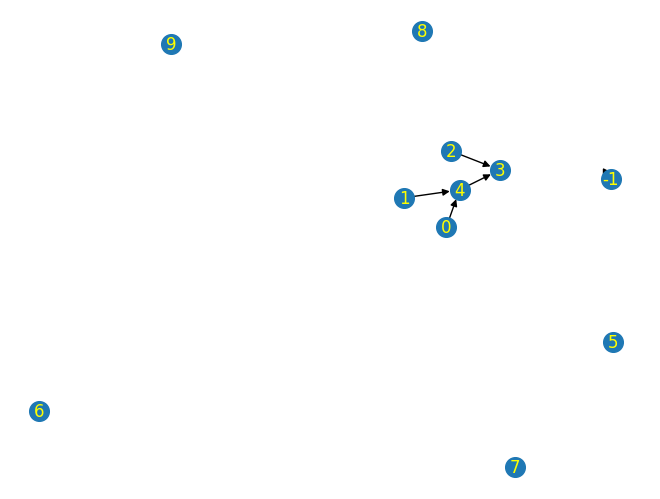

In [2]:
init_params = {
    "max_nodes": 10,
    "senders": jnp.array([0, 1, 2, 4]),
    "receivers": jnp.array([4, 4, 3, 3]),
    "weights": jnp.array([1, 1, 1, 1]),
    "activation_indices": jnp.array([0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1]),
    "inputs": jnp.array([0.5, 0.8, 0.2]),
    "output_size": 1,
}

activation_state, net = make_network(**init_params)
plot_network(net)

In [3]:
jax.tree_map(lambda x: print(f"{x=}"), net)

x=Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)
x=Array([0, 0, 0, 2, 1], dtype=int32)
x=Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)
x=Array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)
x=Array([ 0,  1,  2,  4, -1, -1, -1, -1, -1, -1], dtype=int32)
x=Array([ 4,  4,  3,  3, -1, -1, -1, -1, -1, -1], dtype=int32)
x=1


Network(node_indices=None, node_types=None, activation_indices=None, weights=None, senders=None, receivers=None, output_size=None)

In [4]:
net.weights

Array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [5]:
max_nodes = 10
key = jax.random.PRNGKey(0)

In [6]:
mutations = Mutations(max_nodes=max_nodes)

In [8]:
mutations.weight_shift(net, key, 0.1).weights

Array([0.7389442, 1.0033853, 1.1086333, 1.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       ], dtype=float32)